In [68]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#### Read

In [80]:
imgUnchanged2 = cv.imread('/home/becode/AI/Data/Skyebase/OpenSource/Positive/00038.jpg',-1) 
grayed2 = cv.cvtColor(imgUnchanged2, cv.COLOR_BGR2GRAY)

#### Gaussian Blur

In [111]:
# Guassian blur followed by binary treshold => too high a kernel size might mean I miss finer cracks 
# but gives a smoother crack section
blur = cv.GaussianBlur(grayed2,(21,21),0) # kernelsize tuple must be odd and positive

#### Binary treshold Otsu

In [112]:
ret,th = cv.threshold(blur,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

#### Canny edges

In [113]:
edges = cv.Canny(th,100,200) # apertureSize=7 gives fragmented image !

#### Contours + bounding rectangles

In [114]:
# Find contours  => you can also start from th4 instead of the canny edge image of th4
contours, _ = cv.findContours(th, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# Approximate contours to polygons + get bounding rects and circles
contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
centers = [None]*len(contours)
radius = [None]*len(contours)
for i, c in enumerate(contours):
        contours_poly[i] = cv.approxPolyDP(c, 3, True) # cv.approxPolyDP(contour, epsilon, True)
        boundRect[i] = cv.boundingRect(contours_poly[i])
        centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])

drawing = np.zeros((edges.shape[0], edges.shape[1], 3), dtype=np.uint8)

# Draw polygonal contour + bounding rectangles
import random
for i in range(len(contours)):
    color = (random.randint(0,256), random.randint(0,256), random.randint(0,256))
    cv.drawContours(drawing, contours_poly, i, color)
    cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
        (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)

#### Extreme contour points

In [115]:
# Draw polygonal contour + bounding rectangles
edges = cv.Canny(imgUnchanged2,100,200) # apertureSize=7 gives fragmented image !
drawing2 = np.zeros((edges.shape[0], edges.shape[1], 3), dtype=np.uint8)
import random
for i in range(len(contours)):
    color = (random.randint(0,256), random.randint(0,256), random.randint(0,256))
    cv.drawContours(drawing2, contours_poly, i, color)
    #cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
     #(int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)

In [116]:
# Find extreme points in contour and plot a circle in those places
for cnt in contours:
    leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
    rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
    topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
    bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
    # Draw dots onto image
    #cv2.drawContours(image, [c], -1, (36, 255, 12), 2)
    ## cv.circle(image, center_coordinates, radius, color, thickness)
    cv.circle(drawing2, leftmost, 3, (0, 50, 255), 1)
    cv.circle(drawing2, rightmost, 3, (0, 255, 255), 1)
    cv.circle(drawing2, topmost, 3, (255, 50, 0), 1)
    cv.circle(drawing2, bottommost, 3, (255, 255, 0), 1)

#### Lines between extreme points and euclidean distance

In [121]:
import math
def distance(a,b): # a,b are 2 tuples a = (x1,y1), b= (x2,y2)
    #print(a[0],a[1],b[0],b[1])
    return int(math.sqrt((b[0]-a[0])**2 + (b[1]-a[1])**2))

In [122]:
# Draw polygonal contour + bounding rectangles
edges = cv.Canny(imgUnchanged2,100,200) # apertureSize=7 gives fragmented image !
drawing3 = np.zeros((edges.shape[0], edges.shape[1], 3), dtype=np.uint8)
import random
for i in range(len(contours)):
    color = (random.randint(0,256), random.randint(0,256), random.randint(0,256))
    cv.drawContours(drawing3, contours_poly, i, color)
    #cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
     #(int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
        
# Draw a line between leftmost-rightmost and topmost-bottommost
for cnt in contours:
    leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
    rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
    topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
    bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
    # Draw dots onto image
    #cv2.drawContours(image, [c], -1, (36, 255, 12), 2)
    ## cv.circle(image, center_coordinates, radius, color, thickness)
    cv.circle(drawing3, leftmost, 1, (0, 50, 255), 2)
    cv.circle(drawing3, rightmost, 1, (0, 255, 255), 2)
    cv.circle(drawing3, topmost, 1, (255, 50, 0), 2)
    cv.circle(drawing3, bottommost, 1, (255, 255, 0), 2)
    
    cv.line(drawing3, leftmost, rightmost, (0, 255, 0) , 1)
    cv.line(drawing3, topmost, bottommost, (0, 255, 0) , 1)
    print(f"left-right : {distance(leftmost,rightmost)}")
    print(f"top-bottom: {distance(topmost,bottommost)}")
    

left-right : 16
top-bottom: 12
left-right : 115
top-bottom: 117
left-right : 109
top-bottom: 87
left-right : 31
top-bottom: 38
left-right : 12
top-bottom: 18


#### Plot image processing sequence

(Text(0.5, 1.0, 'Lines btwn extremes'), ([], []), ([], []))

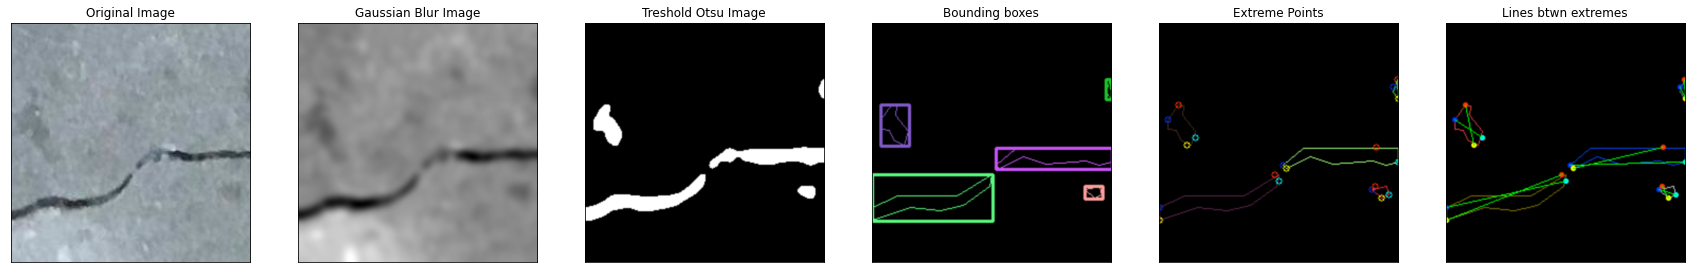

In [123]:
plt.figure(figsize=(30,30))
plt.subplot(161),plt.imshow(imgUnchanged2,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(162),plt.imshow(blur, cmap = 'gray', interpolation = 'bicubic')
plt.title('Gaussian Blur Image'), plt.xticks([]), plt.yticks([])
plt.subplot(163),plt.imshow(th, cmap = 'gray', interpolation = 'bicubic')
plt.title('Treshold Otsu Image'), plt.xticks([]), plt.yticks([])
plt.subplot(164),plt.imshow(drawing, cmap = 'gray', interpolation = 'bicubic')
plt.title('Bounding boxes'), plt.xticks([]), plt.yticks([])
plt.subplot(165),plt.imshow(drawing2, cmap = 'gray', interpolation = 'bicubic')
plt.title('Extreme Points'), plt.xticks([]), plt.yticks([])
plt.subplot(166),plt.imshow(drawing3, cmap = 'gray', interpolation = 'bicubic')
plt.title('Lines btwn extremes'), plt.xticks([]), plt.yticks([])
